### **Introduction**:

The COVID-19 pandemic, caused by the novel coronavirus SARS-CoV-2, has presented an unprecedented global challenge, affecting millions of lives and disrupting economies worldwide. In response to this crisis, data science emerges as a crucial tool to analyze, model, and understand various aspects of the pandemic. This project aims to harness the power of data science techniques to gain insights into the spread, impact, and mitigation strategies of COVID-19 .

# #**2. Initial Hypothesis**
 Based on the dataset provided, we can form the following initial hypotheses:

**Hypothesis 1**:

Patients who were in direct contact with confirmed COVID-19 positive patients are more likely to test positive for the virus.

**Hypothesis 2**:

Symptoms such as shortness of breath, fever, and cough are important factors in predicting COVID-19 positive cases.

## **3. Data Analysis**

# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the Dataset

In [2]:
cdata=pd.read_csv(r'/content/drive/MyDrive/corona_tested_006.csv')

<ipython-input-2-2aa5928b1f46>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  cdata=pd.read_csv(r'/content/drive/MyDrive/corona_tested_006.csv')


# checking dataset info, data types, number of rows and number of columns

In [3]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [4]:
cdata.shape

(278848, 11)

In [5]:
cdata.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [6]:
cdata['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [7]:
cdata[cdata =='None'].count()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

# **Insights**:

There are records with value as None in Age and Sex column.

Also, we can see some data are in UPPERCASE and some are in LOWERCASE.

# **4.Data Cleaning**

converting all the data into lowercase values


In [8]:
cdata['Cough_symptoms']=cdata['Cough_symptoms'].apply(lambda x: True if x=='TRUE'else x)
cdata['Cough_symptoms']=cdata['Cough_symptoms'].apply(lambda x: False if x=='FALSE'else x)

In [9]:
cdata['Cough_symptoms'].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

# **Insights:**

 We have value as "None" in 252 records , we need to impute these values or drop it. As this contain categorical values , Imputing it with Mode(which is False) might make our data bias.

Therefore droping these records is the best option

In [10]:
cdata = cdata[cdata['Cough_symptoms']!='None']


In [11]:
cdata['Cough_symptoms'].value_counts()

False    236368
True      42228
Name: Cough_symptoms, dtype: int64

In [12]:
cdata['Fever']=cdata['Fever'].apply(lambda x: True if x=='TRUE'else x)
cdata['Fever']=cdata['Fever'].apply(lambda x: False if x=='FALSE'else x)

In [13]:
cdata = cdata[cdata['Fever']!='None']



In [14]:
cdata['Fever'].value_counts()

False    256843
True      21751
Name: Fever, dtype: int64

In [15]:
cdata['Sore_throat']=cdata['Sore_throat'].apply(lambda x: True if x=='TRUE'else x)
cdata['Sore_throat']=cdata['Sore_throat'].apply(lambda x: False if x=='FALSE'else x)

In [16]:
cdata['Sore_throat'].value_counts()

False    276672
True       1922
Name: Sore_throat, dtype: int64

In [17]:
cdata['Shortness_of_breath']=cdata['Shortness_of_breath'].apply(lambda x: True if x=='TRUE'else x)
cdata['Shortness_of_breath']=cdata['Shortness_of_breath'].apply(lambda x: False if x=='FALSE'else x)

In [18]:
cdata['Shortness_of_breath'].value_counts()

False    277020
True       1574
Name: Shortness_of_breath, dtype: int64

In [19]:
cdata['Headache']=cdata['Headache'].apply(lambda x: True if x=='TRUE'else x)
cdata['Headache']=cdata['Headache'].apply(lambda x: False if x=='FALSE'else x)

In [20]:
cdata['Headache'].value_counts()

False    276186
True       2408
Name: Headache, dtype: int64

In [21]:
cdata['Age_60_above'].value_counts()

None    127315
No      125504
Yes      25775
Name: Age_60_above, dtype: int64

In [22]:
#renaming "None" value to "Unknown".
cdata['Age_60_above']=cdata['Age_60_above'].apply(lambda x: 'unknown' if x=='None'else x)

In [23]:
cdata['Age_60_above'].value_counts()

unknown    127315
No         125504
Yes         25775
Name: Age_60_above, dtype: int64

In [24]:
cdata['Sex'].value_counts()

female    130030
male      129012
None       19552
Name: Sex, dtype: int64

In [25]:
#renaming "None" value to "Unknown".
cdata['Sex']=cdata['Sex'].apply(lambda x: 'unknown' if x=='None'else x)

In [26]:
cdata['Sex'].value_counts()

female     130030
male       129012
unknown     19552
Name: Sex, dtype: int64

In [27]:
cdata['Known_contact'].value_counts()

Other                     242504
Abroad                     25462
Contact with confirmed     10628
Name: Known_contact, dtype: int64

## In corona column we have other value, as we are trying to build a model which can predict positive or negative. so we can drop other values for our ml model accuracy.

In [28]:
cdata['Corona'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona, dtype: int64

In [29]:
cdata=cdata[cdata['Corona']!='other']

In [30]:
cdata['Corona'].value_counts()

negative    260008
positive     14694
Name: Corona, dtype: int64

In [31]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               274702 non-null  int64 
 1   Test_date            274702 non-null  object
 2   Cough_symptoms       274702 non-null  object
 3   Fever                274702 non-null  object
 4   Sore_throat          274702 non-null  bool  
 5   Shortness_of_breath  274702 non-null  bool  
 6   Headache             274702 non-null  bool  
 7   Corona               274702 non-null  object
 8   Age_60_above         274702 non-null  object
 9   Sex                  274702 non-null  object
 10  Known_contact        274702 non-null  object
dtypes: bool(3), int64(1), object(7)
memory usage: 19.6+ MB


# Insights:

## After Data Cleaning, we are now left with 2,74,702 Records, in which 2,60,008 patients are "corona negative" and 14,694 are "corona positive" .

## 5. **EDA**

# Checking the count of corona cases:

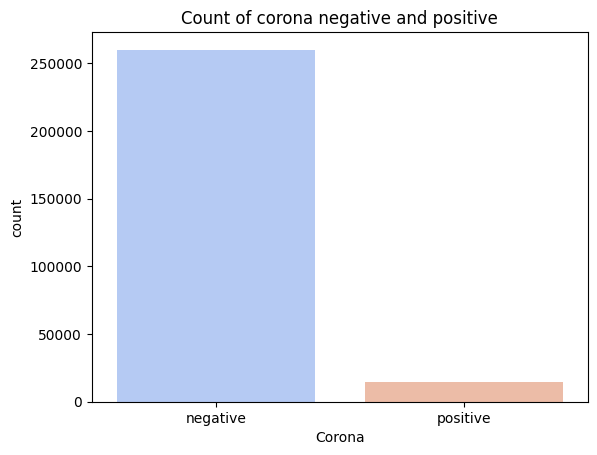

In [32]:
sns.countplot(data=cdata, x= 'Corona',hue='Corona',palette='coolwarm',)
plt.title('Count of corona negative and positive')
plt.show()

## Changing the datatype of test_date column object to datetime datatype.

In [33]:
cdata['Test_date']=pd.to_datetime(cdata['Test_date'],format = '%d-%m-%Y')

In [34]:
cdata['month']=cdata['Test_date'].dt.month

In [35]:
cdata.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
0,1,2020-03-11,True,False,True,False,False,negative,unknown,unknown,Abroad,3
1,2,2020-03-11,False,True,False,False,False,positive,unknown,unknown,Abroad,3
2,3,2020-03-11,False,True,False,False,False,positive,unknown,unknown,Abroad,3
3,4,2020-03-11,True,False,False,False,False,negative,unknown,unknown,Abroad,3
4,5,2020-03-11,True,False,False,False,False,negative,unknown,unknown,Contact with confirmed,3


## As the data set is from month of march and april. I want to check which month as the highest corona positive and corona negative cases.

<ipython-input-36-b1e60a40f3a4>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=cdata, x= 'month',hue='Corona',palette=my_colors)


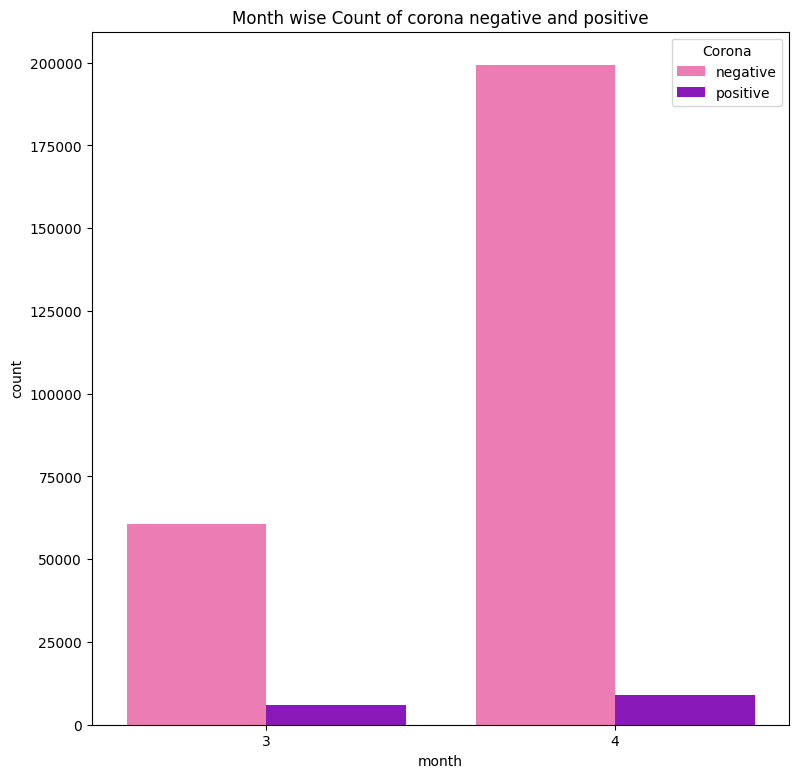

In [36]:

plt.figure(figsize=(9,9))
my_colors=['hotpink','darkviolet','yellow',]
sns.countplot(data=cdata, x= 'month',hue='Corona',palette=my_colors)
plt.title('Month wise Count of corona negative and positive')
plt.show()

## **Insights**:

### -> From the above count plot we can see that april has most negative cases compare to march.
### -> The corona positive cases are much less in both the months.

In [37]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               274702 non-null  int64         
 1   Test_date            274702 non-null  datetime64[ns]
 2   Cough_symptoms       274702 non-null  object        
 3   Fever                274702 non-null  object        
 4   Sore_throat          274702 non-null  bool          
 5   Shortness_of_breath  274702 non-null  bool          
 6   Headache             274702 non-null  bool          
 7   Corona               274702 non-null  object        
 8   Age_60_above         274702 non-null  object        
 9   Sex                  274702 non-null  object        
 10  Known_contact        274702 non-null  object        
 11  month                274702 non-null  int64         
dtypes: bool(3), datetime64[ns](1), int64(2), object(6)
memory usage: 21.7+ M

In [38]:
clms_to_plot=cdata.columns[(cdata.dtypes=='object') | (cdata.dtypes=='bool')]
clms_to_plot=list(clms_to_plot.drop('Corona'))
clms_to_plot

['Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'Known_contact']

In [39]:
filter1_df = pd.DataFrame(cdata[cdata['Corona'] == 'positive'])


In [40]:
filter2_df = pd.DataFrame(cdata[cdata['Corona'] == 'negative'])


####**Relationship Between Independent Features and Dependent Features**

## I want to check the ration of all the symtoms columns(cough,fever,headace,breathing shortage) with the corona column.

##to checck the ratio i used the pie chart which shows me the percentage of each column with corona positive cases and corona negative cases

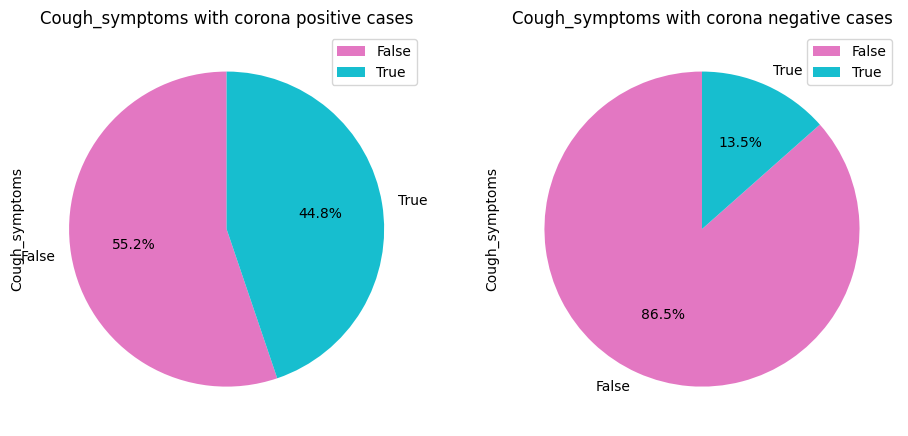

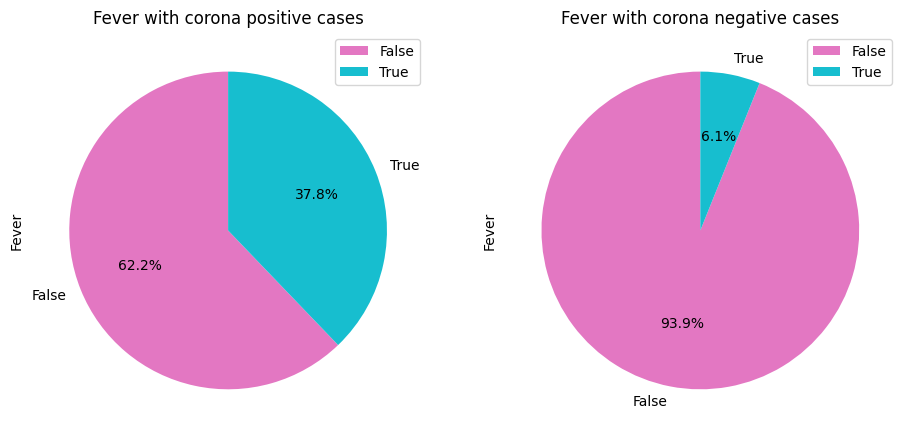

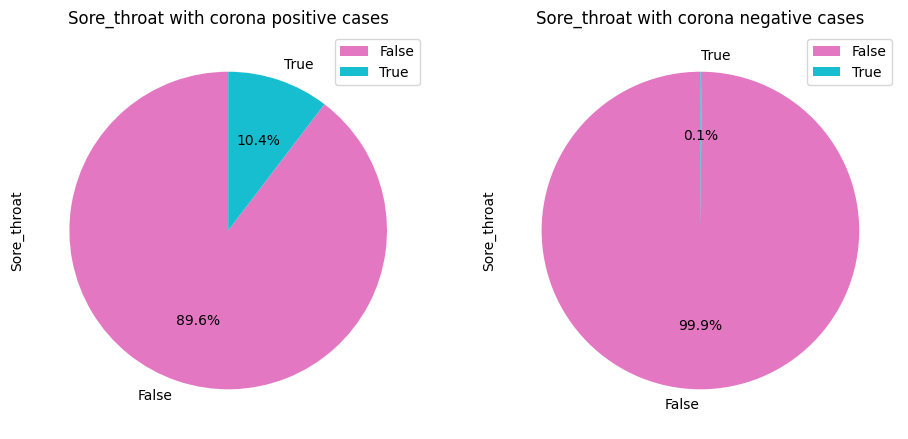

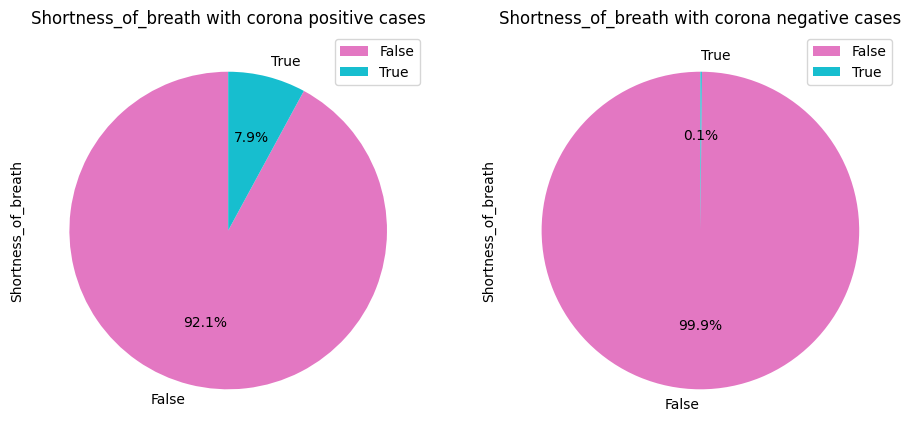

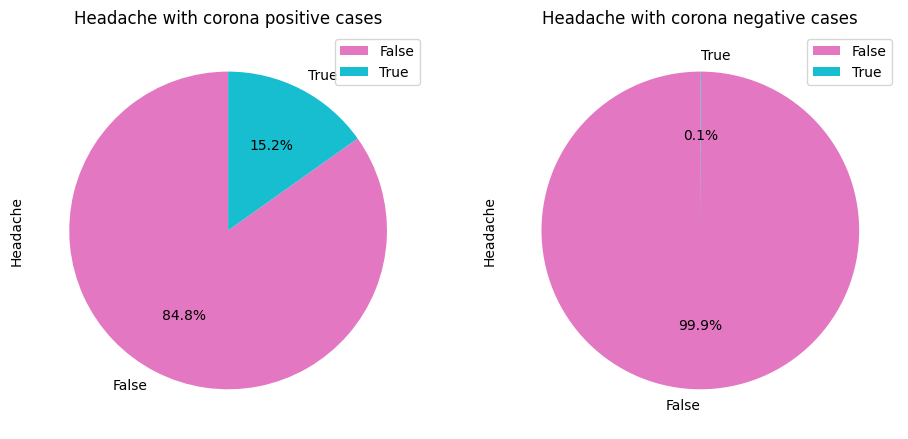

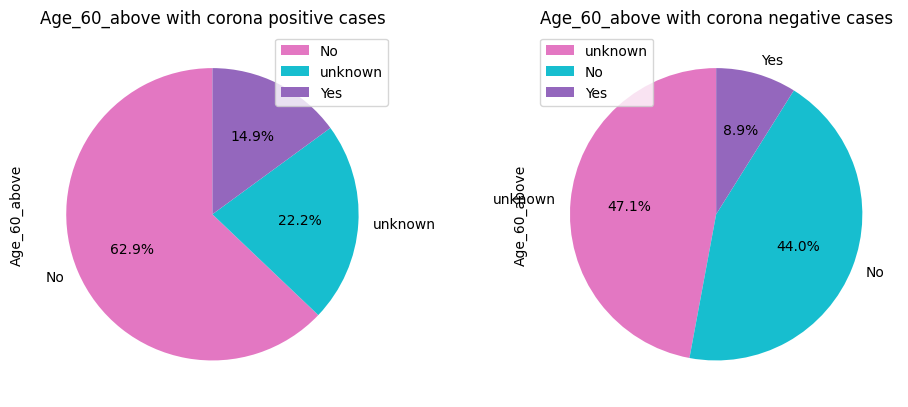

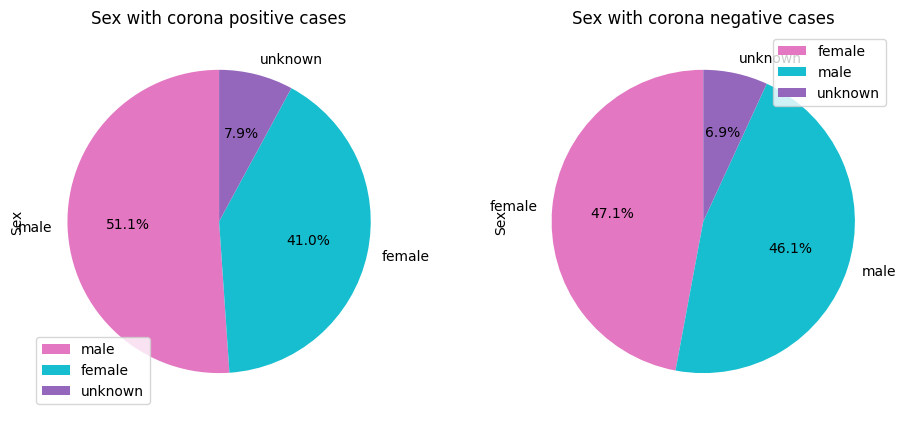

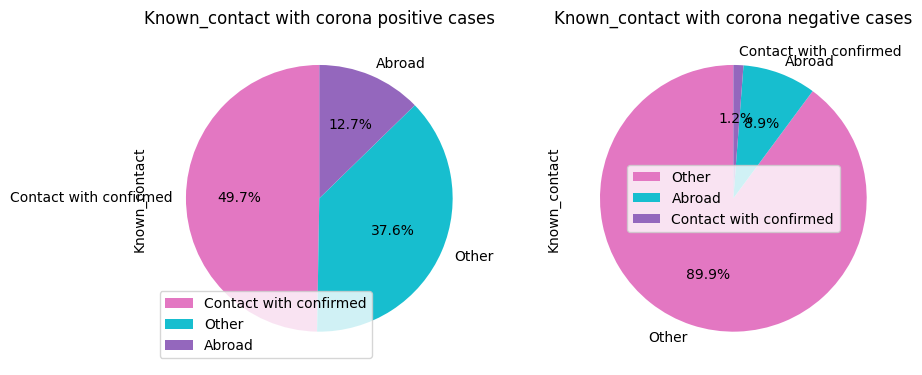

In [41]:
for columns in clms_to_plot:
  plt.figure(figsize=(10,10))

# for patients with Corona positive
  plt.subplot(1,2,1)
  my_colors=['C6','C9','C4']
  filter1_df[columns].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=my_colors)
  plt.title(f'{columns} with corona positive cases')
  plt.legend()

# for patients with Corona negative
  plt.subplot(1,2,2)
  filter2_df[columns].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=my_colors)
  plt.title(f'{columns} with corona negative cases')

  plt.legend()
  plt.tight_layout(pad = 4)
  plt.show()

# **# Perfoming LabelEncoding**

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df_copy=cdata.copy()

In [44]:
df_copy=df_copy.drop(columns=['Ind_ID','month'])

In [45]:
df_copy['Cough_symptoms']=le.fit_transform(df_copy['Cough_symptoms'])
df_copy['Fever']=le.fit_transform(df_copy['Fever'])
df_copy['Sore_throat']=le.fit_transform(df_copy['Sore_throat'])
df_copy['Shortness_of_breath']=le.fit_transform(df_copy['Shortness_of_breath'])
df_copy['Headache']=le.fit_transform(df_copy['Headache'])
df_copy['Corona']=le.fit_transform(df_copy['Corona'])
df_copy['Age_60_above']=le.fit_transform(df_copy['Age_60_above'])
df_copy['Sex']=le.fit_transform(df_copy['Sex'])
df_copy['Known_contact']=le.fit_transform(df_copy['Known_contact'])

In [46]:
df_copy.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,2,2,0
1,2020-03-11,0,1,0,0,0,1,2,2,0
2,2020-03-11,0,1,0,0,0,1,2,2,0
3,2020-03-11,1,0,0,0,0,0,2,2,0
4,2020-03-11,1,0,0,0,0,0,2,2,1


# Checking Coorelation among the attributes

In [47]:
corr_dfcpy=df_copy.corr()

<ipython-input-47-51f0fe14f5f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_dfcpy=df_copy.corr()


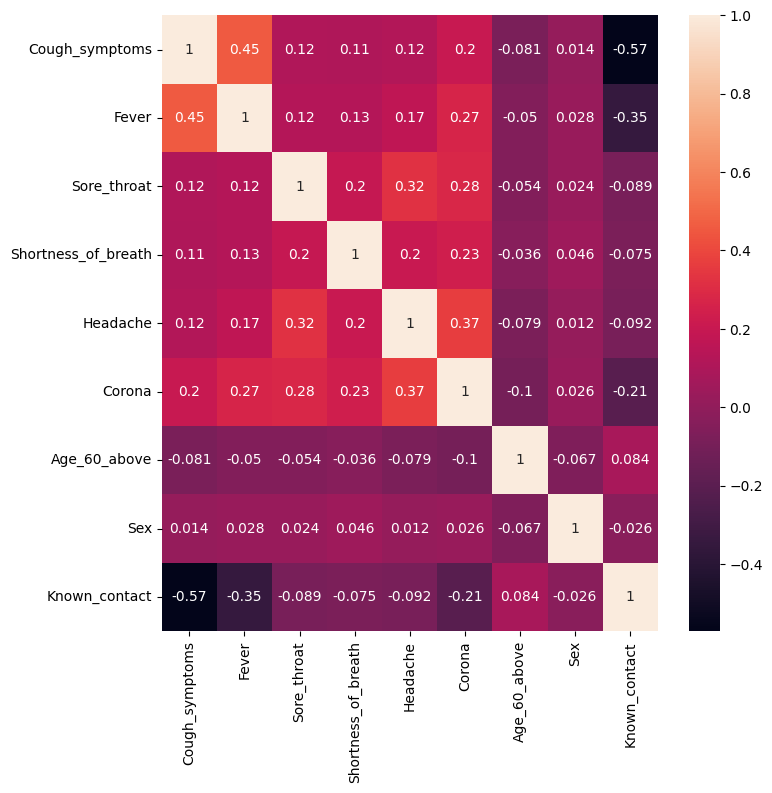

In [48]:
plt.figure(figsize=[8,8])
sns.heatmap(data=corr_dfcpy,annot = True, cbar = True)
plt.show()

## Insights:

Almost all the attributes are moderately corelated with each other but none is highly corelated.

## **6. Feature Engineering**

**It includes feature creation, Feature scaling,feature extraction and feature selection.**

# **Train/Test Split Based on Date**
As per our business requirement, I am taking 11 March 2020 to 15 April 2020 as Training and validation set and 16 April 2020 to 30 April 2020 as Test Set.

In [49]:
## Breaking the data according to the date
condition = pd.Timestamp("2020-04-15")
df_train=df_copy[df_copy['Test_date'] <= condition]
df_test=df_copy[df_copy['Test_date'] > condition]

In [50]:
# Data from 11th march 2020 to 15th april 2020
df_train

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,2,2,0
1,2020-03-11,0,1,0,0,0,1,2,2,0
2,2020-03-11,0,1,0,0,0,1,2,2,0
3,2020-03-11,1,0,0,0,0,0,2,2,0
4,2020-03-11,1,0,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,0,0,0,0,0,0,2,1,2
163185,2020-04-15,0,0,0,0,0,0,2,1,2
163186,2020-04-15,0,0,0,0,0,0,2,0,2
163187,2020-04-15,0,0,0,0,0,0,2,1,2


In [51]:
# Data from 16th april 2020 to 30th april 2020
df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,1,0,0,0,0,0,2,0,0
163190,2020-04-16,0,0,0,0,0,0,2,0,2
163191,2020-04-16,1,0,0,0,0,0,2,0,0
163192,2020-04-16,0,0,0,0,0,0,2,1,2
163193,2020-04-16,0,0,0,0,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,2,1,2
278844,2020-04-30,0,0,0,0,0,0,2,0,2
278845,2020-04-30,0,0,0,0,0,0,2,1,2
278846,2020-04-30,0,0,0,0,0,0,2,1,2


##Separating dataset into Training set, Test Set and Validation set

In [52]:
# dropping column Test_date and Corona column , and storing it to X_train
X_train=df_train.drop(columns=['Test_date','Corona'])

In [53]:
# storing corona in y_train.
y_train=df_train['Corona']

In [54]:
# dropping Test_date column and Corona column from df_test and storing it to X_test.
X_test=df_test.drop(columns=['Test_date','Corona'])

In [55]:
# storing corona in y_test.
y_test=df_test['Corona']

## Importing model selection train test split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 8)

In [58]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# Test Set

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Validation Set

print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (128370, 8)
y_train shape: (128370,)
X_test shape: (114239, 8)
y_test shape: (114239,)
X_val shape: (32093, 8)
y val shape: (32093,)


## Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [61]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.fit_transform(X_test)

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()


In [63]:
lg.fit(X_train,y_train)

LogisticRegression()

In [64]:
lg_prd=lg.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [67]:
# Train score and Test score of Logistic Regression


print("Train accuracy of Logistic Regression is", lg.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lg.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lg_prd))


print(classification_report(y_test, lg_prd))

Train accuracy of Logistic Regression is 0.943678429539612
Accuracy (Test) score of Logistic Regression is 0.9762077749280018
Accuracy (Test) score of Logistic Regression is 0.9762077749280018
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.26      0.00      0.01      2698

    accuracy                           0.98    114239
   macro avg       0.62      0.50      0.50    114239
weighted avg       0.96      0.98      0.96    114239



## Confusion Matix

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

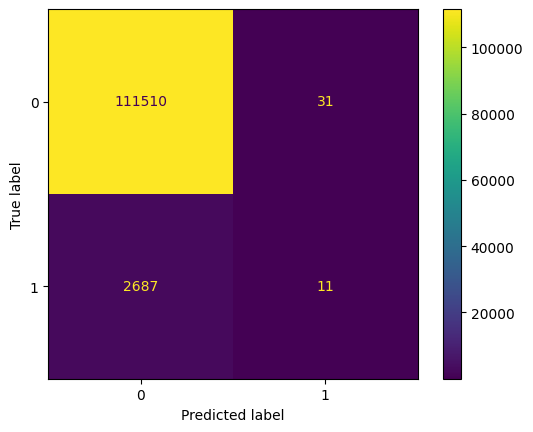

In [70]:
cm=confusion_matrix(y_test, lg_prd)


cmd=ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()
plt.show()


# KNeighbors Classifie

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [72]:
## Making prediction on test dataset
knn_pred=knn.predict(X_test)

In [73]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_pred))

Train accuracy of KNN is 0.9568668692062008
Accuracy (Test) score of KNN is 0.9811623000901618
Accuracy (Test) score of KNN is 0.9811623000901618
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.76      0.30      0.43      2698

    accuracy                           0.98    114239
   macro avg       0.87      0.65      0.71    114239
weighted avg       0.98      0.98      0.98    114239



### **Insights :**

The Accuracy from KNN model is 98.12% which is better than logistic regression model.

#Decision Tree Algorithm





In [74]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier


# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)


In [75]:
## Making prediction on test dataset
dt_pred=dt.predict(X_test)

In [76]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

Train accuracy of Decision Tree is 0.9511334423930825
Accuracy (Test) score of Decision Tree is 0.9854340461663705
Accuracy (Test) score of Decision Tree is 0.9854340461663705
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.88      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



### **Insights :**

In Decision Tree Algorithm, we can see that Accuracy is 98.54% which is again a little higher than KNN model

# Random Forest






In [77]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [78]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

In [79]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rf_pred))

Train accuracy of Random Forest is 0.9594531432577705
Accuracy (Test) score of Random Forest is 0.98517143882562
Accuracy (Test) score of Random Forest is 0.98517143882562
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.75      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



### **Insights :**

Random Forest gives us the accuracy of 98.5 which is equal to Decison Tree Algorithm.

### **Conclusion :**

After testing and evaluating the data from different algorithm. I have came to the conclusion that **Logistic Regression** gives us the least accuracy i.e. 97% and the rest **KNN algorithm**, **Decision Tree algorithm** and **Random Forest algorithm** gives us an accuracy of 98%. So we can use any of these 3 models.